In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib_inline
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.font_manager as fm
import collections
from collections import Counter

In [3]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
# print(font_list)
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
from konlpy.tag import Mecab

In [7]:
plt.rc('font', family='Malgun Gothic') # For Windows
print(plt.rcParams['font.family'])

['Malgun Gothic']


In [8]:
# ndf1 = pd.read_csv('./윤석열/윤석열_2022-02-09~2022-02-16_result2.csv',encoding='utf-8')
# ndf2 = pd.read_csv('./윤석열/윤석열_2022-02-16~2022-02-23_result2.csv',encoding='utf-8')
# ndf3 = pd.read_csv('./윤석열/윤석열_2022-02-23~2022-03-02_result2.csv',encoding='utf-8')
# ndf4 = pd.read_csv('./윤석열/윤석열_2022-03-02~2022-03-09_result2.csv',encoding='utf-8')
# ndfs = [ndf1, ndf2, ndf3, ndf4]

In [184]:
ndf = pd.read_csv('D:\PY4E\DS\snsscrape/2번남_라벨링.csv',encoding='utf-8')
ndf

,Unnamed: 0,Datetime,Username,Like Count,Text,pred
0,0,2022-03-09,mingyulover_k,1,2번남이든 1번남이든.. 2번남이라고 생각드면 걍 탈빠하세요 개지랄하지말고,0
1,1,2022-03-09,callate1992,1,2번녀들 일처 다부제로 2번남들 다 끌어안고 살아줘 웅웅 나는 외롭게 혼자 살게 ...,0
2,2,2022-03-09,frdbora,0,"여성가족부 폐지 7글자 보고 페미 없앤다고 투표한 2번남, 이니를 위해 여리 지킨다...",0
3,3,2022-03-09,Roretzi_ShB,1,대 2번남들진짜 부끄러운줄 알아야함..... 누구든 노동자일수있다. 알바든 정...,0
4,4,2022-03-09,ff14_Tinkerbell,1,2번남들 지들이 개천에서 날 용 인줄 앎 개천 속 돌맹이만도 못 한데,0
...,...,...,...,...,...,...
16656,16908,2022-02-25,mu_tlapf2,0,어우 ....어제4시에 자서 시알람...햇는데 지금깻어.... 하.... 오늘 관극...,0
16657,16909,2022-02-17,Nae_Ma_Eum,4,내가아는테리우스는2번남잔대-.-;;,0
16658,16910,2022-02-13,leemaryellow,113,💝아로하의 선택 💝 1번남 ✨ 2번남 ✨ 3번남 #아스트로 #아로하 # ...,1
16659,16911,2022-02-13,luvnosan2,0,2번남 어그로잘끌게생겼네,0


In [185]:
# Preprocessing code with Mecab
#dicpath="/usr/local/lib/mecab/dic/mecab-ko-dic"
from eunjeon import Mecab

mecab = Mecab()# Mecab User Dic Path

def preprocessing_mecab(readData):
    
    #### Clean text
    #sentence = CleanText(readData)
    
    #### Tokenize
    morphs = mecab.pos(readData)
    
    JOSA = ["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"] # 조사
    SIGN = ["SF", "SE", "SSO", "SSC", "SC", "SY"] # 문장 부호
    TERMINATION = ["EP", "EF", "EC", "ETN", "ETM"] # 어미
    SUPPORT_VERB = ["VX"] # 보조 용언
    NUMBER = ["SN"]
    
    # Remove JOSA, EOMI, etc
    morphs[:] = (morph for morph in morphs if morph[1] not in JOSA+SIGN+TERMINATION+SUPPORT_VERB)
        
    # Remove length-1 words  
    morphs[:] = (morph for morph in morphs if not (len(morph[0]) == 1))
    
    # Remove Numbers
    # morphs[:] = (morph for morph in morphs if morph[1] not in NUMBER)

    # Result pop-up
    result = []
    for morph in morphs:
        result.append(morph[0])
        
    return result

In [186]:
# m_tokenized1 = ndf1['text'].apply(lambda x: preprocessing_mecab(x))
# m_tokenized2 = ndf2['text'].apply(lambda x: preprocessing_mecab(x))
# m_tokenized3 = ndf3['text'].apply(lambda x: preprocessing_mecab(x))
# m_tokenized4 = ndf4['text'].apply(lambda x: preprocessing_mecab(x))
# m_tokenized = [m_tokenized1, m_tokenized2, m_tokenized3, m_tokenized4]

In [204]:
stop_words = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
plus_stop_words = ['남자', '아스트로','로하','오프', '진짜','번남번남', '이번', '지금', '우리', '번남', '정말','때문','사실', '오늘','한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ','진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는','생겼', '인데', '해도', '된다', '이거']
for word in plus_stop_words:
    stop_words.append(word) 

In [205]:
ndf['Tokenized'] = ndf['Text'].apply(lambda x: preprocessing_mecab(x))
ndf['Tokenized'] = ndf['Tokenized'].apply(lambda x: [item for item in x if item not in stop_words])
ndf

,Unnamed: 0,Datetime,Username,Like Count,Text,pred,Tokenized
0,0,2022-03-09,mingyulover_k,1,2번남이든 1번남이든.. 2번남이라고 생각드면 걍 탈빠하세요 개지랄하지말고,0,"[생각, 개지랄]"
1,1,2022-03-09,callate1992,1,2번녀들 일처 다부제로 2번남들 다 끌어안고 살아줘 웅웅 나는 외롭게 혼자 살게 ...,0,"[일처, 부제, 남들, 끌어안, 웅웅, 외롭, 혼자, 평생, 직장, 가지, 심심, ..."
2,2,2022-03-09,frdbora,0,"여성가족부 폐지 7글자 보고 페미 없앤다고 투표한 2번남, 이니를 위해 여리 지킨다...",0,"[여성, 가족, 폐지, 글자, 페미, 없앤다고, 투표, 위해, 여리, 지킨다고, 투..."
3,3,2022-03-09,Roretzi_ShB,1,대 2번남들진짜 부끄러운줄 알아야함..... 누구든 노동자일수있다. 알바든 정...,0,"[부끄러운, 누구, 노동자, 정직, 조상, 힘들, 운동, 쟁취, 권리, 생각, 없이]"
4,4,2022-03-09,ff14_Tinkerbell,1,2번남들 지들이 개천에서 날 용 인줄 앎 개천 속 돌맹이만도 못 한데,0,"[남들, 개천, 개천, 맹이, 한데]"
...,...,...,...,...,...,...,...
16656,16908,2022-02-25,mu_tlapf2,0,어우 ....어제4시에 자서 시알람...햇는데 지금깻어.... 하.... 오늘 관극...,0,"[어우, 어제, 시알, 관극, 마티, 생각, 그래, 이제, 렟페어막인데]"
16657,16909,2022-02-17,Nae_Ma_Eum,4,내가아는테리우스는2번남잔대-.-;;,0,"[리우스, 잔대]"
16658,16910,2022-02-13,leemaryellow,113,💝아로하의 선택 💝 1번남 ✨ 2번남 ✨ 3번남 #아스트로 #아로하 # ...,1,[선택]
16659,16911,2022-02-13,luvnosan2,0,2번남 어그로잘끌게생겼네,0,[]


In [206]:
#  날짜별 가장 많이 언급된 단어와 단어의 갯수를 dict형태로 가져와서 dataframe으로 만들어주는 과정
date_list = []
word_list = []
count_list = []

print(ndf['Datetime'].unique())


['2022-03-09' '2022-03-08' '2022-03-07' '2022-03-06' '2022-03-05'
 '2022-03-04' '2022-03-03' '2022-03-02' '2022-02-28' '2022-02-27'
 '2022-02-25' '2022-02-17' '2022-02-13' '2022-02-11']


In [207]:
from collections import Counter

In [208]:
#  날짜별 최빈단어와 빈도수 찾는 함수
def common_words(words, k):
    c = Counter(words)
    cw = c.most_common(k)
    return c, cw

In [209]:
def add_value_labels(ax, spacing=5):
    for idx, rect in enumerate(ax.patches):
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{0}".format(df['Word'][idx])

        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)


In [210]:
# 날짜별 가장 많이 언급된 단어와 단어의 갯수를 dict형태로 가져와서 dataframe으로 만들어주는 과정
date = []
word_list = []
count_list = []

for i in ndf['Datetime'].unique():
    tokenizing = sum(ndf[ndf['Datetime'] == i]['Tokenized'],[])
    c, cw = common_words(tokenizing, 1)    
    word = cw[0][0]
    count = cw[0][1]
    date.append(i)
    word_list.append(word)
    count_list.append(count)

IndexError: list index out of range

In [211]:
dateworddict = {'Date' : date, 'Word' : word_list, 'Count' : count_list}
df = pd.DataFrame(dateworddict, columns=['Date', 'Word', 'Count'])
df

,Date,Word,Count
0,2022-03-09,생각,682
1,2022-03-08,여성,126
2,2022-03-07,사람,73
3,2022-03-06,사람,123
4,2022-03-05,생각,381
5,2022-03-04,너무,129
6,2022-03-03,윤정한,1
7,2022-03-02,대처,1


C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


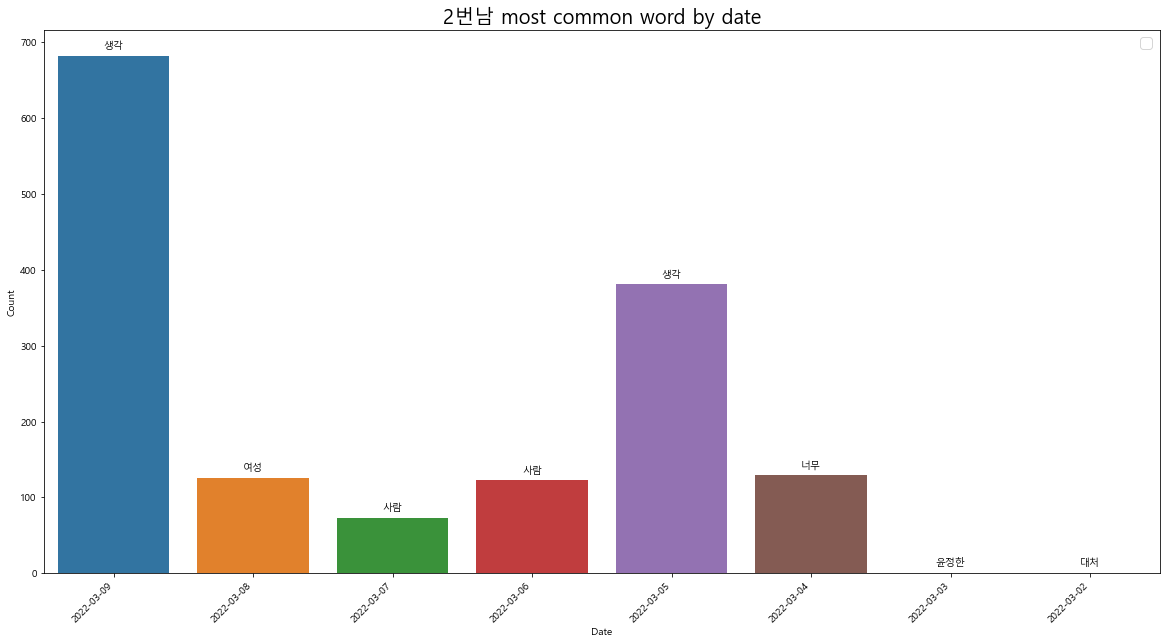

In [212]:
# graph
fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(df['Date'], df['Count'])
add_value_labels(ax)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('2번남 most common word by date', fontsize=20)
plt.legend(fontsize=15)
plt.show()
# save_fig("most common word by date")

주차별 분석

In [213]:
ndf['Datetime'].unique()

array(['2022-03-09', '2022-03-08', '2022-03-07', '2022-03-06',
       '2022-03-05', '2022-03-04', '2022-03-03', '2022-03-02',
       '2022-02-28', '2022-02-27', '2022-02-25', '2022-02-17',
       '2022-02-13', '2022-02-11'], dtype=object)

In [214]:
ndf1= ndf[ndf['Datetime']<='2022-02-15' ]
ndf1 = pd.DataFrame(ndf1, columns=['Datetime', 'WUsernamerd', 'Like Count','Text','pred', 'Tokenized'])
ndf1

,Datetime,WUsernamerd,Like Count,Text,pred,Tokenized
16658,2022-02-13,NaN,113,💝아로하의 선택 💝 1번남 ✨ 2번남 ✨ 3번남 #아스트로 #아로하 # ...,1,[선택]
16659,2022-02-13,NaN,0,2번남 어그로잘끌게생겼네,0,[]
16660,2022-02-11,NaN,0,_ 2번남: 3번남(내남자): 4번남:,0,[]


In [215]:
ndf2 = ndf[ndf['Datetime'] <= '2022-02-22']
ndf2 = ndf2[ndf2['Datetime'] > '2022-02-15']
ndf2 = pd.DataFrame(ndf2, columns=['Datetime', 'WUsernamerd', 'Like Count','Text','pred', 'Tokenized'])

ndf2

,Datetime,WUsernamerd,Like Count,Text,pred,Tokenized
16657,2022-02-17,NaN,4,내가아는테리우스는2번남잔대-.-;;,0,"[리우스, 잔대]"


In [216]:
ndf3 = ndf[ndf['Datetime'] <= '2022-03-01']
ndf3 = ndf3[ndf3['Datetime'] > '2022-02-22']
ndf3 = pd.DataFrame(ndf3, columns=['Datetime', 'Usernamerd', 'Like Count','Text','pred', 'Tokenized'])

ndf3

,Datetime,WUsernamerd,Like Count,Text,pred,Tokenized
16654,2022-02-28,NaN,1,_ __ 저요..제가요..저..저요.. 2년간 싹 2번남,0,[]
16655,2022-02-27,NaN,1,내가 본 첫 4 는 닥스였는데 최악중에 최악이였음 포탈 열때마다 불똥 튄다고 후추...,0,"[닥스, 최악, 최악, 포탈, 불똥, 튄다고, 후추, 오지, 뿌려, 영화, 내내, ..."
16656,2022-02-25,NaN,0,어우 ....어제4시에 자서 시알람...햇는데 지금깻어.... 하.... 오늘 관극...,0,"[어우, 어제, 시알, 관극, 마티, 생각, 그래, 이제, 렟페어막인데]"


In [217]:
ndf4 = ndf[ndf['Datetime'] <= '2022-03-09']
ndf4 = ndf4[ndf4['Datetime'] > '2022-03-01']
ndf4 = pd.DataFrame(ndf4, columns=['Datetime', 'WUsernamerd', 'Like Count','Text','pred', 'Tokenized'])

ndf4

,Datetime,WUsernamerd,Like Count,Text,pred,Tokenized
0,2022-03-09,NaN,1,2번남이든 1번남이든.. 2번남이라고 생각드면 걍 탈빠하세요 개지랄하지말고,0,"[생각, 개지랄]"
1,2022-03-09,NaN,1,2번녀들 일처 다부제로 2번남들 다 끌어안고 살아줘 웅웅 나는 외롭게 혼자 살게 ...,0,"[일처, 부제, 남들, 끌어안, 웅웅, 외롭, 혼자, 평생, 직장, 가지, 심심, ..."
2,2022-03-09,NaN,0,"여성가족부 폐지 7글자 보고 페미 없앤다고 투표한 2번남, 이니를 위해 여리 지킨다...",0,"[여성, 가족, 폐지, 글자, 페미, 없앤다고, 투표, 위해, 여리, 지킨다고, 투..."
3,2022-03-09,NaN,1,대 2번남들진짜 부끄러운줄 알아야함..... 누구든 노동자일수있다. 알바든 정...,0,"[부끄러운, 누구, 노동자, 정직, 조상, 힘들, 운동, 쟁취, 권리, 생각, 없이]"
4,2022-03-09,NaN,1,2번남들 지들이 개천에서 날 용 인줄 앎 개천 속 돌맹이만도 못 한데,0,"[남들, 개천, 개천, 맹이, 한데]"
...,...,...,...,...,...,...
16649,2022-03-03,NaN,0,윤정한 파란색이잖아 ^^ 요즘대세 1번남2번남 비교하기예요,0,"[윤정한, 파란색, 요즘, 대세, 비교, 예요]"
16650,2022-03-03,NaN,4016,1번남과 2번남 #사전투표,0,"[남과, 사전, 투표]"
16651,2022-03-03,NaN,3,이대남 아니고 이(2)번남,0,[이대남]
16652,2022-03-02,NaN,0,2번남대처법 저녀석또지랄하네하고넘기기,0,"[대처, 녀석, 지랄, 하네, 넘기]"


In [218]:
m_tokenized1 = ndf1['Text'].apply(lambda x: preprocessing_mecab(x))
m_tokenized2 = ndf2['Text'].apply(lambda x: preprocessing_mecab(x))
m_tokenized3 = ndf3['Text'].apply(lambda x: preprocessing_mecab(x))
m_tokenized4 = ndf4['Text'].apply(lambda x: preprocessing_mecab(x))

In [219]:
m_tokenized = [m_tokenized1, m_tokenized2, m_tokenized3, m_tokenized4]


In [223]:
def weekly_distribution(m_tokenized):
    n_corpus = [] 
    for t in m_tokenized:
        for j in t:
            if j not in stop_words:
                n_corpus.append(j) #mecab에서 명사 추출

    count = collections.Counter(n_corpus) 
    most = count.most_common() #빈도 수 순으로 추출 
    x, y= [], [] 
    for word,count in most[:50]: 
        x.append(word) 
        y.append(count)
    #plt.rc('font',family='NanumGothic.ttf')
    plt.rcParams['font.family'] = "Malgun Gothic"
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(10,10)) 
    plt.title('2번남 most common word by weeks', fontsize=20)

    sns.barplot(x=y,y=x)

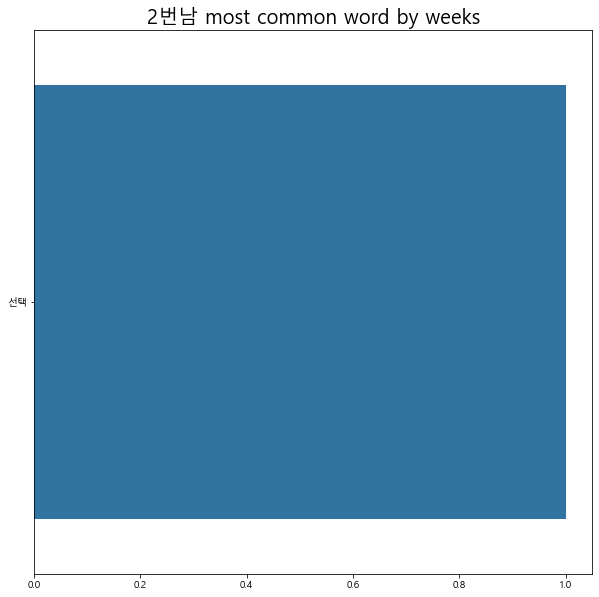

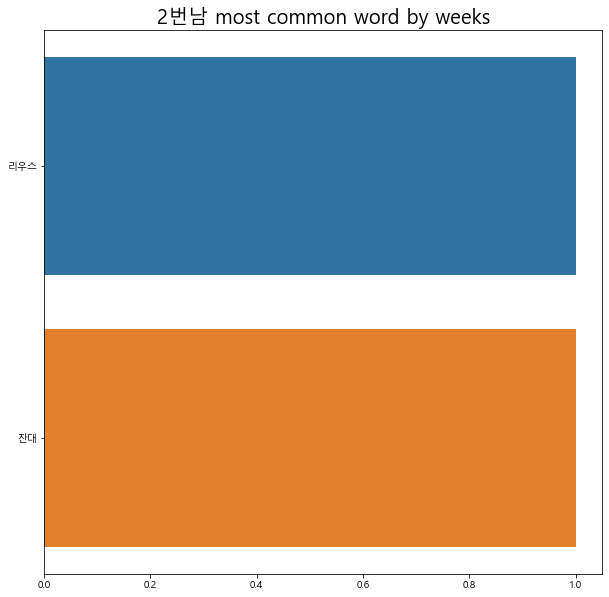

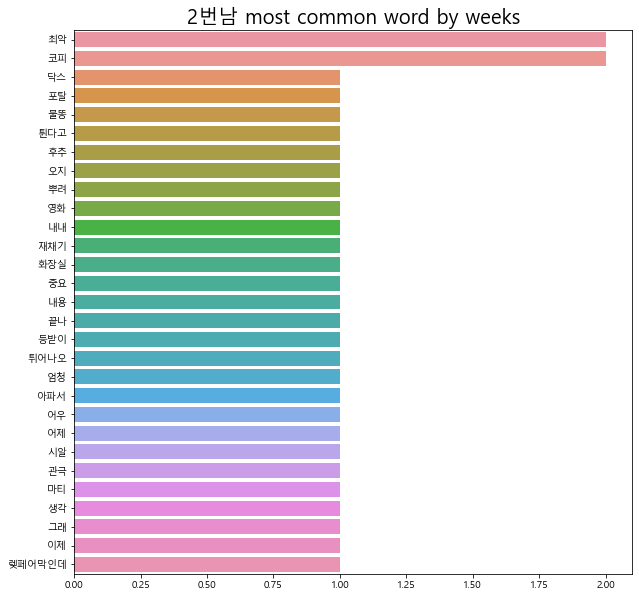

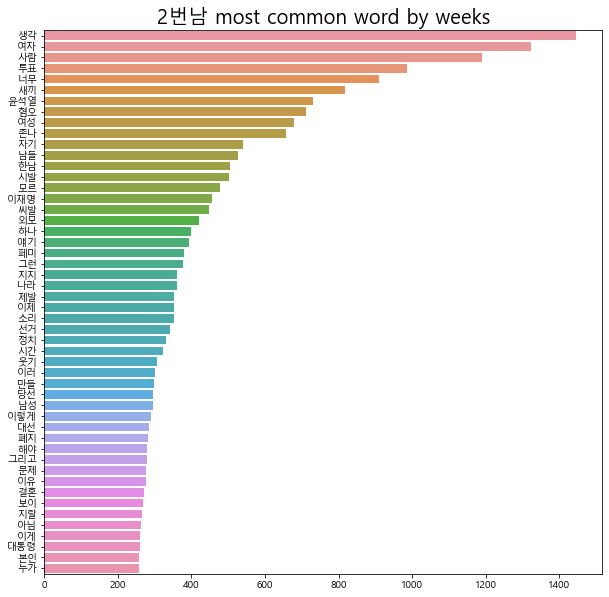

In [224]:
for i in m_tokenized:
    weekly_distribution(i)